In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [2]:
basepath = os.path.expanduser('../')

## Load Data

In [7]:
%%time

app_train = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/application_train.pkl'))
# app_test  = pd.read_feather(os.path.join(basepath, 'data/processed/application_test.feather'))

bureau       = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/bureau.pkl'))
# prev_app     = pd.read_pickle(os.path.join(basepath, 'data/processed/prev_app.pkl'))
# installments = pd.read_pickle(os.path.join(basepath, 'data/processed/installments_payments.pkl')) 
# pos_cash     = pd.read_pickle(os.path.join(basepath, 'data/processed/pos_cash.pkl'))
# credit_bal  = pd.read_pickle(os.path.join(basepath, 'data/processed/credit_card_balance.pkl'))

CPU times: user 67.7 ms, sys: 238 ms, total: 306 ms
Wall time: 2.24 s


In [4]:
app_train.sample(n=10).SK_ID_CURR

14981     117491
168780    295636
58653     167989
36682     142486
69900     181082
109580    227086
127783    248201
141197    263704
217823    352370
299252    446680
Name: SK_ID_CURR, dtype: int32

In [12]:
bureau.loc[bureau.SK_ID_CURR == 181082]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1040560,181082,5767024,Closed,currency 1,-434,0,-250.0,-248.0,NaN,0,31860.0,0.0,0.0,0.0,Consumer credit,-91,NaN
1040561,181082,5767025,Closed,currency 1,-391,0,-210.0,-210.0,NaN,0,17509.5,0.0,0.0,0.0,Consumer credit,-205,NaN
1040562,181082,5767026,Closed,currency 1,-1036,0,-670.0,-915.0,NaN,0,152955.0,0.0,0.0,0.0,Consumer credit,-914,NaN
1040563,181082,5767027,Active,currency 1,-152,0,929.0,NaN,NaN,0,49500.0,19309.5,0.0,0.0,Credit card,-6,NaN
1040564,181082,5767028,Closed,currency 1,-838,0,-650.0,-649.0,0.0,0,18396.0,0.0,0.0,0.0,Consumer credit,-646,NaN


In [40]:
bureau.CREDIT_ACTIVE.cat.codes.value_counts()

2    1079273
0     630607
3       6527
1         21
dtype: int64

In [41]:
bureau.CREDIT_ACTIVE.value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [30]:
# find all active records and take mean of days credit
res = bureau.loc[bureau.CREDIT_ACTIVE == 'Active', ['SK_ID_CURR', 'DAYS_CREDIT']]
res = -res.groupby('SK_ID_CURR')['DAYS_CREDIT'].mean()

res = app_train.SK_ID_CURR.map(res)

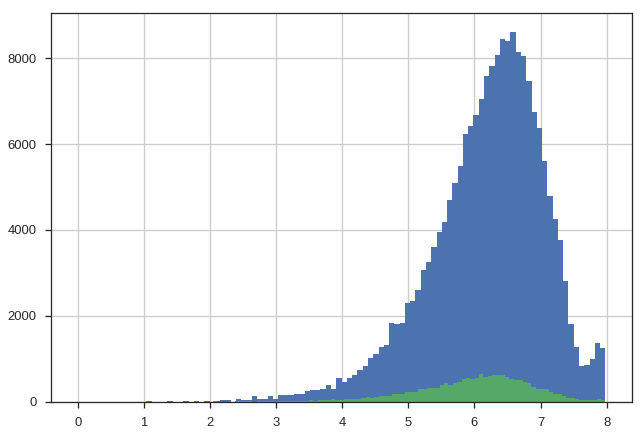

In [31]:
res[(app_train.TARGET == 0)].map(np.log1p).hist(bins=100)
res[(app_train.TARGET == 1)].map(np.log1p).hist(bins=100);

In [35]:
# find all active records and take mean of days credit
res = bureau.loc[bureau.CREDIT_ACTIVE == 'Active', ['SK_ID_CURR', 'AMT_CREDIT_SUM']]
res = res.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()

res = app_train.SK_ID_CURR.map(res)

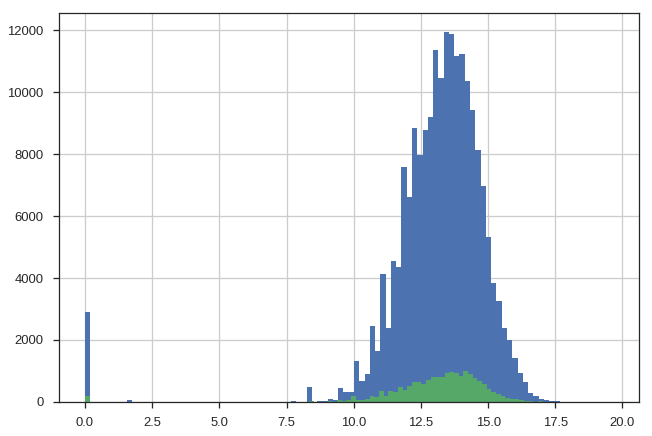

In [37]:
res[(app_train.TARGET == 0)].map(np.log1p).hist(bins=100)
res[(app_train.TARGET == 1)].map(np.log1p).hist(bins=100);

In [38]:
res[(app_train.TARGET == 0)].map(np.log1p).mean(), res[(app_train.TARGET == 1)].map(np.log1p).mean()

(13.120186969465449, 13.145019527952881)